In [84]:
'''Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")
'''
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report

#### Reading Dataset

In [85]:
bank=pd.read_csv('C:/Users/rayad/samatha assinments/logistic_regression/bank-full.csv', delimiter=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### EDA

In [86]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [87]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


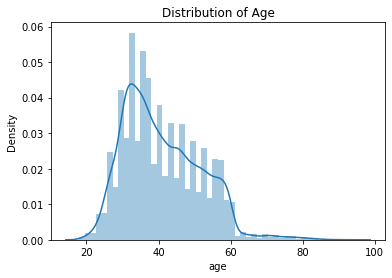

In [20]:
plt.figure(figsize=(6, 4)) # figsize(Width, Height)
sns.distplot(bank['age'])
plt.title('Distribution of Age')
plt.show()

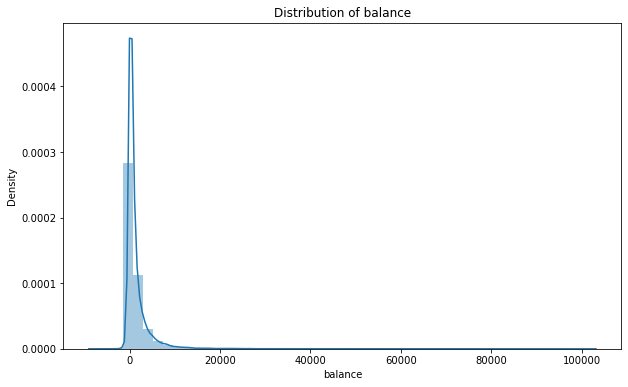

In [72]:
plt.figure(figsize=(10, 6)) # figsize(Width, Height)
sns.distplot(bank['balance'])
plt.title('Distribution of balance')
plt.show()

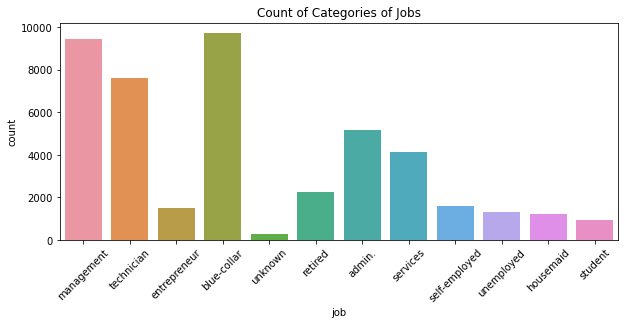

In [73]:
plt.figure(figsize=(10, 4)) # figsize(Width, Height)
sns.countplot(bank['job'])
plt.title('Count of Categories of Jobs')
plt.xticks(rotation = 45)
plt.show()

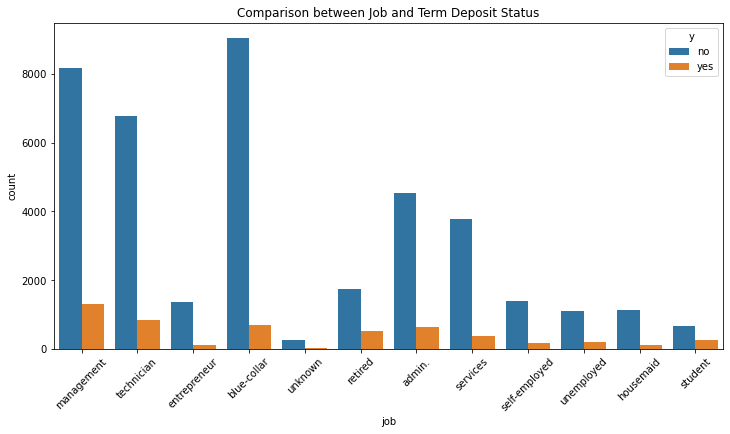

In [79]:
plt.figure(figsize=(12, 6)) # figsize(Width, Height)
sns.countplot(x = 'job', hue= 'y', data= bank)
plt.title('Comparison between Job and Term Deposit Status')
plt.xticks(rotation = 45)
plt.show()

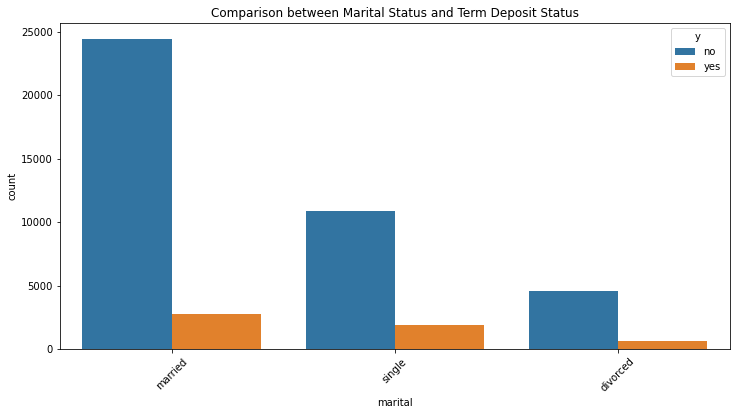

In [80]:
plt.figure(figsize=(12, 6)) # figsize(Width, Height)
sns.countplot(x = 'marital', hue= 'y', data= bank)
plt.title('Comparison between Marital Status and Term Deposit Status')
plt.xticks(rotation = 45)
plt.show()

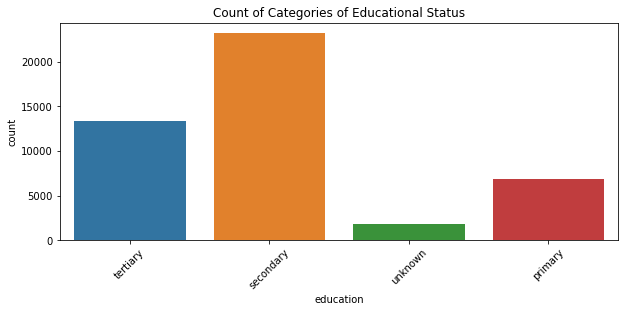

In [81]:
plt.figure(figsize=(10, 4)) # figsize(Width, Height)
sns.countplot(bank['education'])
plt.title('Count of Categories of Educational Status')
plt.xticks(rotation = 45)
plt.show()

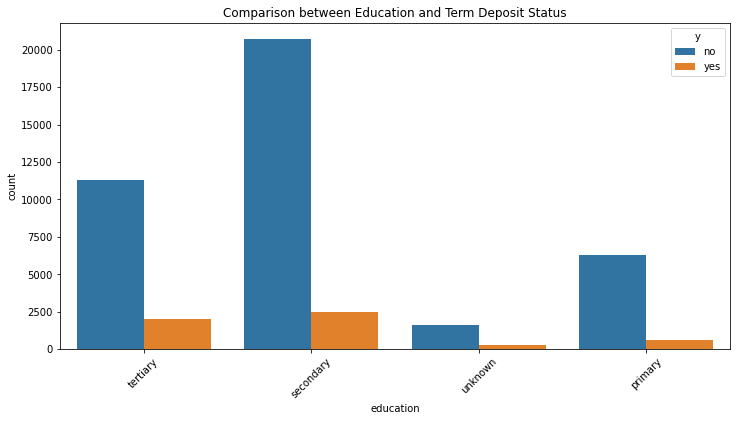

In [82]:
plt.figure(figsize=(12, 6)) # figsize(Width, Height)
sns.countplot(x = 'education', hue= 'y', data= bank)
plt.title('Comparison between Education and Term Deposit Status')
plt.xticks(rotation = 45)
plt.show()

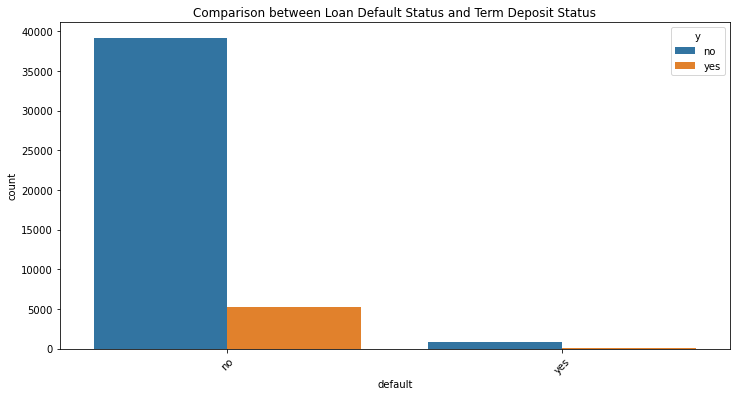

In [83]:
plt.figure(figsize=(12, 6)) # figsize(Width, Height)
sns.countplot(x = 'default', hue= 'y', data= bank)
plt.title('Comparison between Loan Default Status and Term Deposit Status')
plt.xticks(rotation = 45)
plt.show()

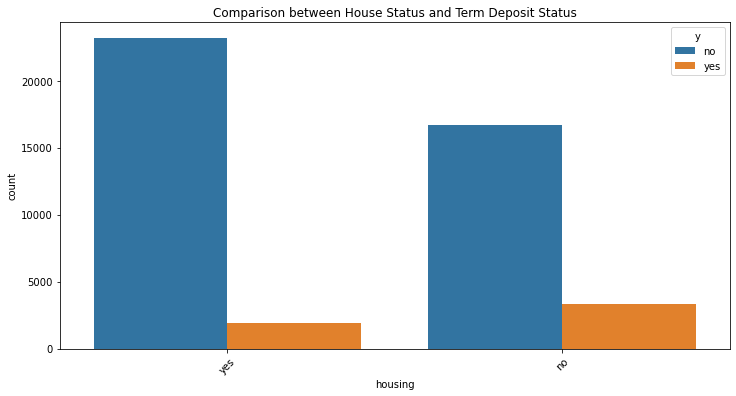

In [42]:
plt.figure(figsize=(12, 6)) # figsize(Width, Height)
sns.countplot(x = 'housing', hue= 'y', data= bank)
plt.title('Comparison between House Status and Term Deposit Status')
plt.xticks(rotation = 45)
plt.show()

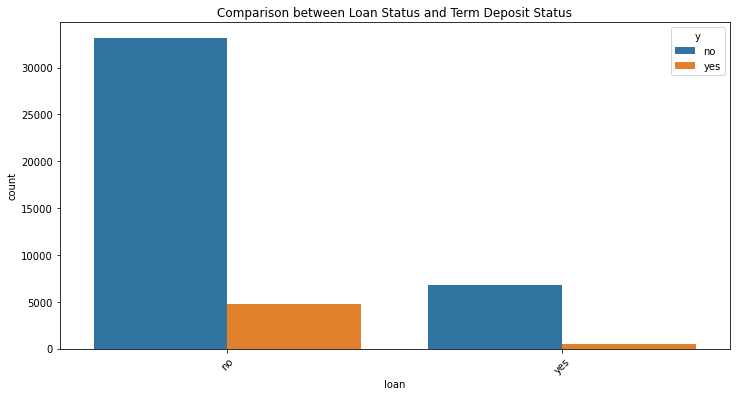

In [43]:
plt.figure(figsize=(12, 6)) # figsize(Width, Height)
sns.countplot(x = 'loan', hue= 'y', data= bank)
plt.title('Comparison between Loan Status and Term Deposit Status')
plt.xticks(rotation = 45)
plt.show()

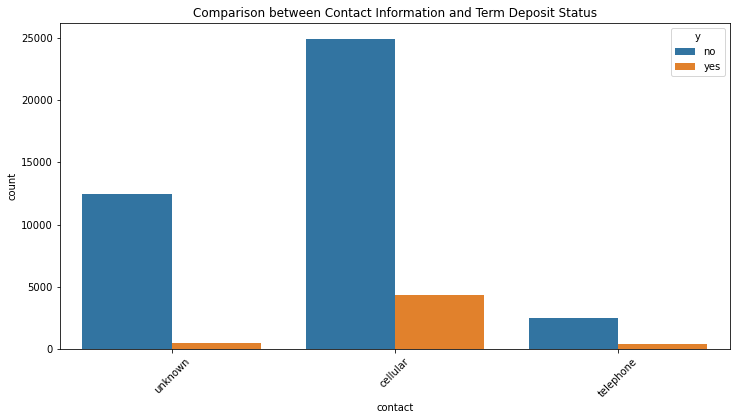

In [44]:
plt.figure(figsize=(12, 6)) # figsize(Width, Height)
sns.countplot(x = 'contact', hue= 'y', data= bank)
plt.title('Comparison between Contact Information and Term Deposit Status')
plt.xticks(rotation = 45)
plt.show()

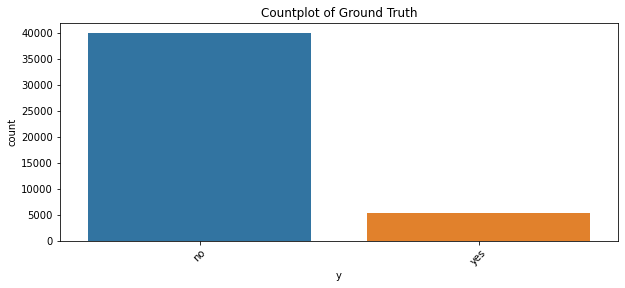

In [45]:
plt.figure(figsize=(10, 4)) # figsize(Width, Height)
sns.countplot(bank['y'])
plt.title('Countplot of Ground Truth')
plt.xticks(rotation = 45)
plt.show()

#### By looking at the above graph we can clearly say that the dataset is highly imbalance

#### Model Building

In [50]:
encoder = LabelEncoder()

cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

bank[cat_cols] = bank[cat_cols].apply(encoder.fit_transform)

In [51]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [52]:
x=bank.iloc[:,0:16]
y=bank.iloc[:,16]

In [53]:
bank["y"].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [54]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=10)

In [55]:
print(xtrain.shape)
print(ytrain.shape)

(33908, 16)
(33908,)


In [56]:
classifier = LogisticRegression()

In [57]:
classifier.fit(xtrain, ytrain)

LogisticRegression()

In [58]:
classifier.coef_

array([[-2.42202382e-02,  1.87666993e-02, -1.07655582e-01,
        -1.56106506e-02, -5.88022666e-03,  3.24442867e-05,
        -2.18970667e-01, -6.49019013e-02, -2.24398922e-01,
        -1.77395738e-02, -7.03457252e-02,  3.53661037e-03,
        -3.20395044e-01, -1.14806302e-03,  1.37748809e-01,
        -2.16086541e-01]])

In [88]:
classifier.intercept_

array([-0.08287471])

In [89]:
y_pred = classifier.predict(xtest)

In [90]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9992
           1       0.54      0.18      0.27      1311

    accuracy                           0.89     11303
   macro avg       0.72      0.58      0.60     11303
weighted avg       0.86      0.89      0.86     11303

